# PART 2 OLD
## **This is not the real working code, you can find it in the file Part2.ipynb**
### This is the old version of my part 2 going a few commits behind you could see the algorithm deleting customers to improve it's score

https://github.com/markusmkim/GA-MDVRP/blob/master/src/MDVRP/CrowdedDepot.java
    

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt 
import random

In [5]:
#utils
def Sqr(a):
    return a*a
 
def Distance(x1,y1,x2,y2):
    return sqrt(Sqr(y2-y1)+Sqr(x2-x1))

In [6]:
fileToOpen = "p01.txt"

m = 0
n = 0
t = 0

In [7]:
ct = 0
with open(fileToOpen) as fin:
    rows = (line.split() for line in fin)
    for row in rows:
        if ct == 0:
            m = int(row[0])
            n = int(row[1])
            t = int(row[2])
            tmp = np.zeros([int(t),2])
            depotz = np.zeros([t, 5])
            customerz = np.zeros([n,5])
        elif ct > 0 and ct <= t:
            for depot in tmp:
                tmp[ct-1] = (row[0],row[1])
        elif ct >= t+1 and ct <= n+t:
            for element in range(n):
                a = n+t+1
                customerz[ct-a] = (row[0],row[1],row[2],row[3],row[4])
        elif ct > t+n:
            a = n+t+1
            for element in range(t):
                mdr = tmp[element][0]
                mlv = tmp[element][1]
                depotz[ct-a] = (row[0],row[1],row[2],mdr,mlv)
        ct = ct + 1
                
    
print (str(m) +" "+ str(n) +" "+ str(t) )

4 50 4


In [22]:
print(depotz)
print(customerz)
indivPerGen = 20

[[51. 20. 20.  0. 80.]
 [52. 30. 40.  0. 80.]
 [53. 50. 30.  0. 80.]
 [54. 60. 50.  0. 80.]]
[[ 1. 37. 52.  0.  7.]
 [ 2. 49. 49.  0. 30.]
 [ 3. 52. 64.  0. 16.]
 [ 4. 20. 26.  0.  9.]
 [ 5. 40. 30.  0. 21.]
 [ 6. 21. 47.  0. 15.]
 [ 7. 17. 63.  0. 19.]
 [ 8. 31. 62.  0. 23.]
 [ 9. 52. 33.  0. 11.]
 [10. 51. 21.  0.  5.]
 [11. 42. 41.  0. 19.]
 [12. 31. 32.  0. 29.]
 [13.  5. 25.  0. 23.]
 [14. 12. 42.  0. 21.]
 [15. 36. 16.  0. 10.]
 [16. 52. 41.  0. 15.]
 [17. 27. 23.  0.  3.]
 [18. 17. 33.  0. 41.]
 [19. 13. 13.  0.  9.]
 [20. 57. 58.  0. 28.]
 [21. 62. 42.  0.  8.]
 [22. 42. 57.  0.  8.]
 [23. 16. 57.  0. 16.]
 [24.  8. 52.  0. 10.]
 [25.  7. 38.  0. 28.]
 [26. 27. 68.  0.  7.]
 [27. 30. 48.  0. 15.]
 [28. 43. 67.  0. 14.]
 [29. 58. 48.  0.  6.]
 [30. 58. 27.  0. 19.]
 [31. 37. 69.  0. 11.]
 [32. 38. 46.  0. 12.]
 [33. 46. 10.  0. 23.]
 [34. 61. 33.  0. 26.]
 [35. 62. 63.  0. 17.]
 [36. 63. 69.  0.  6.]
 [37. 32. 22.  0.  9.]
 [38. 45. 35.  0. 15.]
 [39. 59. 15.  0. 14.]
 [40.  5. 

In [23]:
np.random.seed(0)


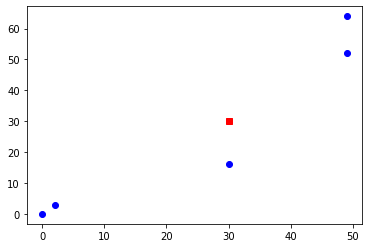

In [24]:
plt.plot(30,30, c='r', marker='s')
plt.scatter(customerz[1], customerz[2], c='b')

In [25]:
class Customer:
    def __init__(self,id,x,y,duration,demand):
        self.id = id
        self.x = x
        self.y = y 
        self.duration = duration
        self.demand = demand
        
            
    def __repr__(self):
        return str(self.id) +" "+ str(self.x) +" "+ str(self.y) + " " + str(self.duration) + " " + str(self.demand)

In [26]:
class Route: #aka chromosome
    def __init__(self, ID, depot):
        self.id = ID
        self.depot = depot #depot assigned to this route
        self.customers = list() 
        self.capacity = 0 #total of the demand
        self.ttlDistance = 0 #Ttl distance of the road
        
    def addDemand(self, d):
        self.capacity = self.capacity + d

    def addCustomer(self,c):
        self.customers.append(c)
        #print(str(self.id)+ " " +str(self.customers) + str(len(self.customers)))
        
    #getting total distance/cost of the route
    def calculTotalDistance(self):
        #print("Route:" + str(self.id)+ " customers:" + str(len(self.customers)))
        ttl = 0
        vTotal = 0
        if len(self.customers) == 0:
            return 0
        first_cust = self.customers[0]
        last_cust = self.customers[-1]
        #print(first_cust)
        #print(last_cust)
        #calculating cost between each cust
        for c in range(len(self.customers)-1):
            #print("x: " +str(self.customers[c].x) +" y: " + str(self.customers[c].y))
            ttl = ttl + Distance(self.customers[c].x,self.customers[c].y,self.customers[c+1].x,self.customers[c+1].y)
            pass
        #and between depot at the begining and end of the route since the veh needs to stop where it started
        for d in depotz:
            #get the right depot
            if (d[0]-n)-1 == self.depot:
                addtt = 0
                addtt = addtt + Distance(first_cust.x, first_cust.y, d[1], d[2])
                addtt = addtt + Distance(last_cust.x, last_cust.y, d[1], d[2])
                vTotal = ttl + addtt
                #print("Distance bw cust: " + str(ttl) + " Added to beg and end: " + str(addtt)+ " Total: " + str(vTotal))
        self.ttlDistance = vTotal
        return vTotal
        
        
    def __repr__(self):
        return "Route: " +str(self.id) +" "+ str(self.depot) + " " + str(len(self.customers))+ " Sz:"+ str(len(self.customers)) + " C:" + str(self.capacity) + " T:" + str(self.ttlDistance)

In [27]:
class Individual:
    def __init__(self):
        self.valid = False
        

In [28]:
class Depot:
    def __init__(self, x, y) :
        self.x = x
        self.y = y
        self.routes = None

In [29]:
vehiclesMxW = depotz[0][4]
nbVehicles = 16 #np.random.randint(t, m*t)  #aka number of routes
indivPerGen = 100


def createRoutes(routes):
    count = 0
    depot = 0
    for i in range(nbVehicles):
        if depot > t-1:
            depot = 0
            count = count + 1
        r = Route(i,depot)
        routes.append(r)
        depot = depot + 1
    
    """ct = 0
    depot = 0
    for i in range(nbVehicles):
        if ct > m-1:
            depot = depot + 1
            ct = 0
        r = Route(i,depot)
        routes.append(r)
        ct = ct + 1
    #print(str(routes))
        """
def assignRdRoute(routes, nbVehicles, randVeh=False):
    for el in customerz:
        #assign a random route to each cust
        routeChoisie = np.random.randint(0, nbVehicles)
        #assign a random depot to each cust
        #depotChoisie = np.random.randint(0, t)
        cust = Customer(el[0], el[1], el[2], el[3], el[4])
        #print(str(routeChoisie) + " " + str(depotChoisie ))
        
        for rt in range(len(routes)):
            if routes[rt].id == routeChoisie :
                #print( str(routes[rt].id)+ "=="+ str(routeChoisie))
                routes[rt].addCustomer(cust)
                routes[rt].addDemand(cust.demand)
            
#create a single solution (set of routes)        
def createSolution():
    routes = list()
    
    #list of routes created
    createRoutes(routes)
    #Assign random routes to each customers
    assignRdRoute(routes,nbVehicles)
    #calculate base distance on route
    #print("Calculating base distance:")
    listOfDistance = list()
    for rt in routes:
        listOfDistance.append(rt.calculTotalDistance())
    #print()
    #print(listOfDistance)
    #print(routes)
    return routes

In [30]:
createSolution()

[Route: 0 0 3 Sz:3 C:42.0 T:130.28067738433225,
 Route: 1 1 3 Sz:3 C:51.0 T:142.15757584080768,
 Route: 2 2 2 Sz:2 C:56.0 T:86.97143066529686,
 Route: 3 3 9 Sz:9 C:150.0 T:359.4307653815266,
 Route: 4 0 2 Sz:2 C:35.0 T:86.54937933374157,
 Route: 5 1 4 Sz:4 C:56.0 T:154.57693729381162,
 Route: 6 2 2 Sz:2 C:18.0 T:73.53910524340094,
 Route: 7 3 5 Sz:5 C:78.0 T:176.83478782244595,
 Route: 8 0 5 Sz:5 C:76.0 T:257.3779595039374,
 Route: 9 1 3 Sz:3 C:36.0 T:94.4152266520577,
 Route: 10 2 1 Sz:1 C:9.0 T:81.43709228600933,
 Route: 11 3 1 Sz:1 C:15.0 T:78.23042886243178,
 Route: 12 0 2 Sz:2 C:48.0 T:77.16323437638066,
 Route: 13 1 2 Sz:2 C:11.0 T:58.87014051901707,
 Route: 14 2 3 Sz:3 C:37.0 T:105.74825840449714,
 Route: 15 3 3 Sz:3 C:59.0 T:85.03297482723889]

In [31]:
def makeGeneration(nbSolutions=indivPerGen):
    solutions = list()
    for i in range(nbSolutions):
        solutions.append(createSolution())
    return solutions

In [32]:
makeGeneration()
print(makeGeneration()[0])

[Route: 0 0 5 Sz:5 C:87.0 T:225.2807013842469, Route: 1 1 3 Sz:3 C:41.0 T:121.84278253887621, Route: 2 2 4 Sz:4 C:61.0 T:119.92448514451384, Route: 3 3 4 Sz:4 C:54.0 T:182.9414764914237, Route: 4 0 2 Sz:2 C:29.0 T:154.44912633842972, Route: 5 1 3 Sz:3 C:38.0 T:94.2802584635448, Route: 6 2 1 Sz:1 C:11.0 T:82.21921916437786, Route: 7 3 3 Sz:3 C:59.0 T:58.78723402300315, Route: 8 0 1 Sz:1 C:10.0 T:68.35202996254024, Route: 9 1 6 Sz:6 C:100.0 T:159.43150533207472, Route: 10 2 5 Sz:5 C:65.0 T:89.76017743168617, Route: 11 3 1 Sz:1 C:28.0 T:108.6830253535482, Route: 12 0 2 Sz:2 C:10.0 T:74.52683827020672, Route: 13 1 3 Sz:3 C:37.0 T:125.97849889533443, Route: 14 2 3 Sz:3 C:51.0 T:144.4887683087312, Route: 15 3 4 Sz:4 C:96.0 T:182.57150279459182]


In [33]:
#Check if every chromosom is viable to make an individual (capacity < max)
#returns viable candidates and number of healthy individuals
def checkCaryotype(indiv):
    ttl = 0
    viables = list()
    for chromo in indiv:
        if chromo.capacity < vehiclesMxW:
            ttl = ttl + 1
            viables.append(chromo)
    return viables, ttl
#print("Viables: " + str(ttl))
  
#mutate an genome
def mutate(indiv):
    #print("muatating")
    #method picker
    #print(indiv)
    meth = np.random.randint(0,1)
    if meth < 10: #move a random customer to another route
        t_from = np.random.randint(0,len(indiv)-1)
        t_to = np.random.randint(0,len(indiv)-1)
        nbCustomers = len(indiv[t_from].customers)
        nbCustomers2 = len(indiv[t_to].customers)
        which = None
        where = None
        if nbCustomers == 0:
            #print("Canceled")
            return indiv
        elif nbCustomers == 1:
            #print("Swaped")
            which = 0
        else:
            which = np.random.randint(0,nbCustomers-1)
            
        if nbCustomers2 == 0:
            #print("Canceled")
            where = 0
        elif nbCustomers2 == 1:
            #print("Swaped")
            where = 1
        else:
            where = np.random.randint(0,nbCustomers2-1)
        
        cust = indiv[t_from].customers[which]
        #print("ut")
        indiv[t_from].customers.remove(cust)
        indiv[t_to].customers.append(cust)
        #print(indiv)
        return indiv
    
    
#creates a mix of the dna of he 2 parents (splitted randomly in specified interval)
def mixDNA(p1, p2):
    #genes taken from p2 x= rand[q1;q3]
    spliter = np.random.randint(nbVehicles/4, nbVehicles/2)
    poolGenesp1 = p1[:spliter]
    spliter = (spliter - nbVehicles)
    poolGenesp2 = p2[spliter:]
    #print("Parents" + str(p1) + "| " + str(p2) + "genes: " + str(poolGenesp1) + str(poolGenesp2))
    return poolGenesp1 + poolGenesp2 

def crossover(p1,p2):
    spliter = np.random.randint(1, nbVehicles-1)
    #print("Crossing at :" + str(spliter))
    #print(len(p1))
    beginGen1 = p1[:(len(p1)-spliter)]
    beginGen2 = p2[:(len(p2)-spliter)]
    endGen1 = p1[-spliter:]
    endGen2 = p2[-spliter:]
    
    child1 = beginGen1 + endGen2
    child2 = beginGen2 + endGen1
    return child1, child2
    
#get total distance of set of routes
def getTtlDistAll(indiv):
    ttl = 0
    #print("endme")
    for r in indiv:
        ttl = ttl + r.ttlDistance
    return ttl

#get the fitest indiv from a list
def getFitest(epreuve):
    print("{} {} {} {}".format(getTtlDistAll(epreuve[0]), getTtlDistAll(epreuve[1]), getTtlDistAll(epreuve[2]), getTtlDistAll(epreuve[3])))
    val1 = 9999
    fitest1 = None
    val2= 9999
    fitest2 = None
    for el in epreuve:
        if getTtlDistAll(el) < val1:
            val1 = getTtlDistAll(el)
            fitest1 = el
    epreuve.remove(fitest1)
    for el in epreuve:
        if getTtlDistAll(el) < val2:
            val2 = getTtlDistAll(el)
            fitest2 = el
            
        #print(getTtlDistAll(el))
        #print(val)
    #print("fitest1: " + str(val1) + " fitest2: " + str(val2))
    return fitest1, fitest2
        
#returns the right element given a normalized proba as an index
def probaPick(arr, index):
    #print(index)
    if (index <= arr[0][2]): #making sure every possible value are covered (p[p(0);p(n)] but x can be < p(0))
        return arr[0][0]
    for i in range(len(arr)):
        #print("--" + str(arr[i]))
        if i < len(arr): 
            if index >= arr[i][2] and index <= arr[i+1][2]:
                #print("next")
                return arr[i][0]
        else:
            if index >= arr[i][2] and index <= 100:
                #print("snext")
                return arr[i][0]
        
def getParentByDist(arr, dist):
    for i in range(len(arr)):
        fac = 1
        caryocheck = checkCaryotype(arr[i])
        #makes unhealthy individuals twice as unlikely to be picked
        if caryocheck[1] < nbVehicles:
            fac = 2
        #print(str(fac) + " " + str(parent1) + " "+ str(getTtlDistAll(generation[i])*2))
        tmp = float(str(dist))/fac
        if getTtlDistAll(arr[i]) == tmp:
            #print("found parent")
            return arr[i]
            
#candidate = list of valid candidate, reste = unhealthy candidates unused, generation = whole generation
#Create couples, and and child returns them to be compared
def reproduce(generation):    
    parent1 = None
    parent2 = None
    listVal = list()
    
    #proba = sort generation[i] by ttotalDistance   
    #getting total dist and probability depending of them (the bigger the less likely)
    #next few lines are inspired by this : https://stackoverflow.com/questions/2772882/picking-a-random-item-based-on-probabilities
    for i in range(len(generation)):
        caryocheck = checkCaryotype(generation[i])
        #makes unhealthy individuals twice as unlikely to be picked
        if caryocheck[1] < nbVehicles:       
            listVal.append(getTtlDistAll(generation[i])*2)
        else: 
            listVal.append(getTtlDistAll(generation[i]))
    listVal.sort(reverse=True)
    ttl = sum(range(len(listVal)+1))
    cumP = 0
    for i in range(len(listVal)):
        cumP = cumP + ((i+1)/ttl)*100
        listVal[i] = (listVal[i], ((i+1)/ttl)*100, cumP)
    print(str(listVal) + " " +  str(ttl) + " " + str(cumP))
    #picking 2 parents based on proba
    choice = (np.random.uniform(0,100))
    parent1 = probaPick(listVal,choice)
    #print("p1R" + str(parent1) + str(choice))
    parent2 = getParentByDist(generation, parent1) #to enter the loop, to make sure parent2 is different 
    parent1 = getParentByDist(generation, parent1) #from parent1
    while np.array_equal(parent1, parent2):
        choice = (np.random.uniform(0,100))
        parent2 = probaPick(listVal, choice)
        parent2 = getParentByDist(generation, parent2)
        #print(parent1)
    #print("p1 " + str(parent1))
    #print("p2 " + str(parent2))
    
    child1, child2 = crossover(parent1, parent2)
    
    return child1, child2 , parent1, parent2
    
        

In [34]:
def fitness(epochs=50):
    generation = list()
    generation = makeGeneration()
    BOG = [9999,9999]
    BOT = 9999
    ENDGEN = None
    for epoch in range(epochs):
        print("Generation:" + str(epoch))
        #print(generation)
        nextGeneration = list()
        while len(nextGeneration) < indivPerGen : 
            #print("Size nextGen:" + str(len(nextGeneration)) + "Gen: "+ str(i))
            validCand = list()
            invalidCand = list()
            
            
            child1, child2, parent1, parent2 = reproduce(generation)
            
            child1 = mutate(child1)
            child2 = mutate(child2)
            """
            fitlist = [parent1, parent2, child1, child2]
            child1, child2  = getFitest(fitlist)
            """
            nextGeneration.append(child1)
            nextGeneration.append(child2)
        #print("Size next gen: " + str(len(nextGeneration)))
        f1, f2 = getFitest(nextGeneration)
        print("BOG: " + str(getTtlDistAll(f1)) + " " + str(getTtlDistAll(f2)))
        BOG = [getTtlDistAll(f1),getTtlDistAll(f2)]
        if getTtlDistAll(f1) < BOT: 
            BOT = getTtlDistAll(f1)
            ENDGEN = epoch
        if getTtlDistAll(f2) < BOT:
            BOT = getTtlDistAll(f2)
            ENDGEN = epoch
        generation = nextGeneration
        nextGeneration = []
        print("")
    print("BOT: {} at: {}".format(BOT, ENDGEN))
    for el in generation:
        print("--")
        print(el)

In [35]:
fitness()

Generation:0
[(4422.310935762947, 0.019801980198019802, 0.019801980198019802), (4350.077377145734, 0.039603960396039604, 0.0594059405940594), (4320.455770933522, 0.0594059405940594, 0.1188118811881188), (4287.998778371706, 0.07920792079207921, 0.19801980198019803), (4279.490228893128, 0.09900990099009901, 0.29702970297029707), (4272.588846419235, 0.1188118811881188, 0.4158415841584159), (4252.30830894269, 0.1386138613861386, 0.5544554455445545), (4247.2758276293125, 0.15841584158415842, 0.712871287128713), (4245.446726746748, 0.17821782178217824, 0.8910891089108912), (4236.698701564661, 0.19801980198019803, 1.0891089108910892), (4230.842049717069, 0.21782178217821785, 1.306930693069307), (4226.132893395644, 0.2376237623762376, 1.5445544554455446), (4225.185535413911, 0.25742574257425743, 1.801980198019802), (4218.9584689731555, 0.2772277227722772, 2.0792079207920793), (4216.606736139933, 0.297029702970297, 2.376237623762376), (4211.593586885245, 0.31683168316831684, 2.693069306930693),

[(4492.323216310328, 0.0202020202020202, 0.0202020202020202), (4444.243887684625, 0.0404040404040404, 0.0606060606060606), (4399.614160382205, 0.06060606060606061, 0.12121212121212122), (4377.636028866765, 0.0808080808080808, 0.20202020202020202), (4335.128087709235, 0.10101010101010101, 0.30303030303030304), (4313.667052290028, 0.12121212121212122, 0.42424242424242425), (4307.222138622369, 0.1414141414141414, 0.5656565656565656), (4304.816891328099, 0.1616161616161616, 0.7272727272727273), (4304.380995188495, 0.18181818181818182, 0.9090909090909092), (4289.599513903283, 0.20202020202020202, 1.1111111111111112), (4252.294720494796, 0.2222222222222222, 1.3333333333333335), (4227.719314351163, 0.24242424242424243, 1.575757575757576), (4185.120067655845, 0.26262626262626265, 1.8383838383838387), (4174.307042218143, 0.2828282828282828, 2.1212121212121215), (4154.767463785111, 0.30303030303030304, 2.4242424242424248), (4139.081278334037, 0.3232323232323232, 2.747474747474748), (4137.8795108

[(4444.558794541627, 0.0202020202020202, 0.0202020202020202), (4127.840899914273, 0.0404040404040404, 0.0606060606060606), (4070.490310683035, 0.06060606060606061, 0.12121212121212122), (4060.294861926126, 0.0808080808080808, 0.20202020202020202), (4052.410587782552, 0.10101010101010101, 0.30303030303030304), (4045.01685236478, 0.12121212121212122, 0.42424242424242425), (4027.8700694763133, 0.1414141414141414, 0.5656565656565656), (3995.736870474154, 0.1616161616161616, 0.7272727272727273), (3947.2432786892377, 0.18181818181818182, 0.9090909090909092), (3888.198214117814, 0.20202020202020202, 1.1111111111111112), (3854.5377118007814, 0.2222222222222222, 1.3333333333333335), (3844.22682440447, 0.24242424242424243, 1.575757575757576), (3840.4234293776803, 0.26262626262626265, 1.8383838383838387), (3826.687645142989, 0.2828282828282828, 2.1212121212121215), (3817.5776385688973, 0.30303030303030304, 2.4242424242424248), (3815.7476743061725, 0.3232323232323232, 2.747474747474748), (3804.012

[(4382.678952766276, 0.0202020202020202, 0.0202020202020202), (4317.202651699383, 0.0404040404040404, 0.0606060606060606), (4009.5150174645155, 0.06060606060606061, 0.12121212121212122), (3934.8299189825807, 0.0808080808080808, 0.20202020202020202), (3917.9251739133306, 0.10101010101010101, 0.30303030303030304), (3840.622912951311, 0.12121212121212122, 0.42424242424242425), (3822.261700019474, 0.1414141414141414, 0.5656565656565656), (3812.677190439995, 0.1616161616161616, 0.7272727272727273), (3808.6921307370444, 0.18181818181818182, 0.9090909090909092), (3806.2445581002644, 0.20202020202020202, 1.1111111111111112), (3753.4079026756717, 0.2222222222222222, 1.3333333333333335), (3726.4460900372524, 0.24242424242424243, 1.575757575757576), (3694.0506074442715, 0.26262626262626265, 1.8383838383838387), (3655.9501492468767, 0.2828282828282828, 2.1212121212121215), (3648.790698669733, 0.30303030303030304, 2.4242424242424248), (3648.472812771539, 0.3232323232323232, 2.747474747474748), (364

[(4027.918963037539, 0.0202020202020202, 0.0202020202020202), (3876.158016251354, 0.0404040404040404, 0.0606060606060606), (3828.318991994098, 0.06060606060606061, 0.12121212121212122), (3823.6733075857246, 0.0808080808080808, 0.20202020202020202), (3774.6158033903257, 0.10101010101010101, 0.30303030303030304), (3721.2448874812826, 0.12121212121212122, 0.42424242424242425), (3598.9223688267907, 0.1414141414141414, 0.5656565656565656), (3588.6508599978724, 0.1616161616161616, 0.7272727272727273), (3572.2581662067123, 0.18181818181818182, 0.9090909090909092), (3566.9223024372845, 0.20202020202020202, 1.1111111111111112), (3559.011253014763, 0.2222222222222222, 1.3333333333333335), (3551.9387464307956, 0.24242424242424243, 1.575757575757576), (3547.7918124106372, 0.26262626262626265, 1.8383838383838387), (3546.6200136024318, 0.2828282828282828, 2.1212121212121215), (3498.359163281464, 0.30303030303030304, 2.4242424242424248), (3497.577846606146, 0.3232323232323232, 2.747474747474748), (34

[(3917.41635531293, 0.0202020202020202, 0.0202020202020202), (3831.70988372575, 0.0404040404040404, 0.0606060606060606), (3789.8738345136676, 0.06060606060606061, 0.12121212121212122), (3784.727811092482, 0.0808080808080808, 0.20202020202020202), (3661.812508705425, 0.10101010101010101, 0.30303030303030304), (3652.3888206321517, 0.12121212121212122, 0.42424242424242425), (3594.6136972345234, 0.1414141414141414, 0.5656565656565656), (3553.06041117549, 0.1616161616161616, 0.7272727272727273), (3500.5362760709727, 0.18181818181818182, 0.9090909090909092), (3494.209975022194, 0.20202020202020202, 1.1111111111111112), (3491.133695713187, 0.2222222222222222, 1.3333333333333335), (3487.9033910036046, 0.24242424242424243, 1.575757575757576), (3447.7293024181954, 0.26262626262626265, 1.8383838383838387), (3410.556757651064, 0.2828282828282828, 2.1212121212121215), (3398.302386488571, 0.30303030303030304, 2.4242424242424248), (3390.0152032260908, 0.3232323232323232, 2.747474747474748), (3353.735

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[(1029.9045856172927, 0.0202020202020202, 0.0202020202020202), (957.1225469582765, 0.0404040404040404, 0.0606060606060606), (937.8135873977909, 0.06060606060606061, 0.12121212121212122), (931.8417762379016, 0.0808080808080808, 0.20202020202020202), (930.6719643464381, 0.10101010101010101, 0.30303030303030304), (923.6117707889999, 0.12121212121212122, 0.42424242424242425), (911.1052775832699, 0.1414141414141414, 0.5656565656565656), (902.9012472811584, 0.1616161616161616, 0.7272727272727273), (899.1748478968744, 0.18181818181818182, 0.9090909090909092), (897.4179601907622, 0.20202020202020202, 1.1111111111111112), (893.0180622477328, 0.2222222222222222, 1.3333333333333335), (891.5152855256222, 0.24242424242424243, 1.575757575757576), (881.2675516985919, 0.26262626262626265, 1.8383838383838387), (881.2152563765403, 0.2828282828282828, 2.1212121212121215), (875.6983634623615, 0.30303030303030304, 2.4242424242424248), (875.5565812107188, 0.3232323232323232, 2.747474747474748), (871.4081692

778.0659004029084 663.947254971773 808.6296154470707 692.5896478269358
BOG: 591.460790768386 614.2711573703375

Generation:24
[(953.2311340064026, 0.0202020202020202, 0.0202020202020202), (912.2720135522899, 0.0404040404040404, 0.0606060606060606), (838.8736522208219, 0.06060606060606061, 0.12121212121212122), (833.7381140733241, 0.0808080808080808, 0.20202020202020202), (821.3076439419199, 0.10101010101010101, 0.30303030303030304), (821.1815573138068, 0.12121212121212122, 0.42424242424242425), (808.6296154470707, 0.1414141414141414, 0.5656565656565656), (807.4424538469184, 0.1616161616161616, 0.7272727272727273), (806.1391389000348, 0.18181818181818182, 0.9090909090909092), (801.3024752428349, 0.20202020202020202, 1.1111111111111112), (801.2704946880488, 0.2222222222222222, 1.3333333333333335), (796.0524696586672, 0.24242424242424243, 1.575757575757576), (792.8953404941776, 0.26262626262626265, 1.8383838383838387), (791.8638878314549, 0.2828282828282828, 2.1212121212121215), (782.1750

[(831.8577951731555, 0.0202020202020202, 0.0202020202020202), (829.6267488887883, 0.0404040404040404, 0.0606060606060606), (808.6296154470707, 0.06060606060606061, 0.12121212121212122), (796.0524696586672, 0.0808080808080808, 0.20202020202020202), (787.024153498994, 0.10101010101010101, 0.30303030303030304), (778.0659004029084, 0.12121212121212122, 0.42424242424242425), (778.0659004029084, 0.1414141414141414, 0.5656565656565656), (772.6600823876721, 0.1616161616161616, 0.7272727272727273), (771.957584085707, 0.18181818181818182, 0.9090909090909092), (766.9822714559748, 0.20202020202020202, 1.1111111111111112), (764.4484908212706, 0.2222222222222222, 1.3333333333333335), (750.8690734268771, 0.24242424242424243, 1.575757575757576), (746.1563617565969, 0.26262626262626265, 1.8383838383838387), (741.4494417081124, 0.2828282828282828, 2.1212121212121215), (741.4494417081124, 0.30303030303030304, 2.4242424242424248), (740.7951467350379, 0.3232323232323232, 2.747474747474748), (740.7937838432

[(831.8577951731555, 0.0202020202020202, 0.0202020202020202), (751.2111997654449, 0.0404040404040404, 0.0606060606060606), (743.9666266469031, 0.06060606060606061, 0.12121212121212122), (741.4494417081124, 0.0808080808080808, 0.20202020202020202), (738.0885789806705, 0.10101010101010101, 0.30303030303030304), (737.7608215925824, 0.12121212121212122, 0.42424242424242425), (734.1796466609542, 0.1414141414141414, 0.5656565656565656), (709.3396490191387, 0.1616161616161616, 0.7272727272727273), (704.0796799746286, 0.18181818181818182, 0.9090909090909092), (704.0796799746286, 0.20202020202020202, 1.1111111111111112), (699.859442874094, 0.2222222222222222, 1.3333333333333335), (699.859442874094, 0.24242424242424243, 1.575757575757576), (690.436982883925, 0.26262626262626265, 1.8383838383838387), (689.3019021882271, 0.2828282828282828, 2.1212121212121215), (685.140251231723, 0.30303030303030304, 2.4242424242424248), (685.140251231723, 0.3232323232323232, 2.747474747474748), (675.717791241554,

[(715.2176966853714, 0.0202020202020202, 0.0202020202020202), (711.570695303506, 0.0404040404040404, 0.0606060606060606), (710.0182433342088, 0.06060606060606061, 0.12121212121212122), (709.3396490191387, 0.0808080808080808, 0.20202020202020202), (706.8698457770832, 0.10101010101010101, 0.30303030303030304), (690.436982883925, 0.12121212121212122, 0.42424242424242425), (688.4701265432096, 0.1414141414141414, 0.5656565656565656), (687.0708559038599, 0.1616161616161616, 0.7272727272727273), (682.6111641492985, 0.18181818181818182, 0.9090909090909092), (682.4294990192599, 0.20202020202020202, 1.1111111111111112), (673.627697851353, 0.2222222222222222, 1.3333333333333335), (673.627697851353, 0.24242424242424243, 1.575757575757576), (670.6379930107016, 0.26262626262626265, 1.8383838383838387), (670.6379930107016, 0.2828282828282828, 2.1212121212121215), (670.6379930107016, 0.30303030303030304, 2.4242424242424248), (670.6379930107016, 0.3232323232323232, 2.747474747474748), (667.749650185120

[(678.5594733764505, 0.0202020202020202, 0.0202020202020202), (673.1887041591294, 0.0404040404040404, 0.0606060606060606), (670.6379930107016, 0.06060606060606061, 0.12121212121212122), (669.5760070785051, 0.0808080808080808, 0.20202020202020202), (663.4747350699123, 0.10101010101010101, 0.30303030303030304), (658.566462782719, 0.12121212121212122, 0.42424242424242425), (654.5247949816039, 0.1414141414141414, 0.5656565656565656), (645.1264610366953, 0.1616161616161616, 0.7272727272727273), (644.4062479879606, 0.18181818181818182, 0.9090909090909092), (642.8954147523281, 0.20202020202020202, 1.1111111111111112), (642.8954147523281, 0.2222222222222222, 1.3333333333333335), (642.1752017035933, 0.24242424242424243, 1.575757575757576), (642.1752017035933, 0.26262626262626265, 1.8383838383838387), (638.7674729094957, 0.2828282828282828, 2.1212121212121215), (638.5282003217279, 0.30303030303030304, 2.4242424242424248), (638.5282003217279, 0.3232323232323232, 2.747474747474748), (638.528200321

KeyboardInterrupt: 

In [20]:
print(np.random.uniform(0,100))

54.88135039273247


In [40]:
a = [0,1,2,3,4,5,6]
print(a[:4])

[0, 1, 2, 3]
